For this programming assignment, you will be working with the titanic dataset, and eventually training a decision tree classifier to predict whether or not a passenger survived the voyage. Before you train this classifier, you will perform exploratory data analysis on the data, and do a small amount of data cleaning.

This data can be found on Kaggle, with explanations of the attributes: https://www.kaggle.com/c/titanic.

Remember to reference the materials from class; you will find them hugely helpful on this programming assignment.

Each task is worth 1 point, unless indicated otherwise.

## Loading the data

First, we'll load the data into a `pandas` dataframe, and use the `describe` method to summarize the data.

In [1]:
import pandas as pd

titanic_df = pd.read_csv("https://github.com/lynn0032/MLCamp2021/raw/main/titanic_train.csv")

titanic_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We can also look at the first few rows of data.

In [2]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has the following attributes. I gathered this information by looking at the summary above, and by referencing Kaggle (https://www.kaggle.com/c/titanic).


*   **PassengerId**. This is a number that is a unique identifier for each passenger. If we were to load this data into a SQL database, this would be the key.
*   **Survived**. This is a binary attribute, and only takes the values 0 and 1. A value of 0 indicates that the passenger did not survive the titanic disaster, while a value of 1 indicates that the passenger did survive. Although these are numbers, this is best thought of as categorical. We will look at the value counts for this later, to see how it is distributed.
*   **Pclass**. This takes the values 1, 2, and 3, and indicates the ticket class of the passenger. So, 1 indicates they have a first class ticket, 2 is a second class ticket, and 3 is a third class ticket. Note that this ordinal, since the classes have a meaningful order.
*   **Name**. This is the name of the passenger. Note that we would consider this neither categorical nor numerical, since it's not a number and they don't fall into categories (as each passenger probably has a different name).
*   **Sex**. This takes the values "male" and "female", treating sex as a binary. This is unfortunate, as we know that sex and gender are more nuanced, but this is common in historical datasets (and some modern datasets). This is categorical. From the table above, we can see that "male" occurs more frequently than "female", with 577 out of the 891.
*   **Age**. This is the age of the passenger, and is numerical. From the table above, we can see that the youngest passenger was .42 (which is five months), and the oldest passenger was 80. The mean age is 29.70 and the median age is 28. Note that this has missing values, as we only have 714 values for age, while there are 891 passengers in the dataset.
*   **SibSp**. This stands for siblings/spouses, and gives the number of sublings or spouses the passenger is traveling with. The minimum is 0 and the maximum is 8. The mean is 0.52 and the median is 0. So, we suspect that this is skewed.
*   **Parch**. This stands for parents/children, and gives the number of parents or children the passenger is traveling with. The minimum is 0 and the maximum is 6. The mean is 0.38 and the median is 0. We suspect that this is skewed.
*   **Ticket**. This is the ticket number for the passenger's ticket. Note that some passengers have the same ticket number, presumably when they are traveling together.
*   **Fare**. This is the fare that the passenger paid for their ticket. The minimum is 0 and the maximum is 512.33. The mean is 32.20 and the median is 14.45. We suspect that this is skewed.
*   **Cabin**. This is the cabin number that the passenger stayed in on the ship. An example value is C85. There are many missing values in this column, perhaps because not all passengers stayed in cabins.
*   **Embarked**. This is the port of embarkation, which indicates where the passenger boarded the titanic. It takes values "C", "Q", and "S", where C stands for Cherbourg, Q stands for Queenstown, S stands for Southampton. This is categorical. Note that "S" is the most common, with 644 passengers. This has two missing values, as there are 889 values in this column.



To predict whether or not a passenger will survive, we will not use PassengerId, Name, Ticket, or Cabin, so we drop those columns from the dataframe. This leaves us with Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked to use to predict whether or not a passenger survived.

In [3]:
titanic_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

titanic_df.describe(include = "all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


## Task 0: Predict Performance

We will train a classifier to use Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked to predict whether or not a passenger survived.

Now, you should think about what "good" performance would be for this dataset. What is the best possible accuracy that you think is possible to achieve for this task? Why do you think that is the best possible?

Note: this will be graded for completion, so just make your best guess.

- good performance for this data would be its capacity to make more correct predications after being trained on the training data and we test on the testing portion, if there's a close accuracy measure in the state of survival afte running the test on the testing data and comapring the result aginst the actual expected outputs porvided in the testing data.

- I would consider an accuracy rate of more than 90% would be accurate,altough I am thinking that some of the attributes that we dropped my affect our accuracy rate.  

## Task 1: EDA - Survived

We will begin our exploratory data analysis by looking at the survived column. You will compute value counts, create a bar graph, and then comment on the distribution of the column.

In [4]:
# your code here - compute value counts

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

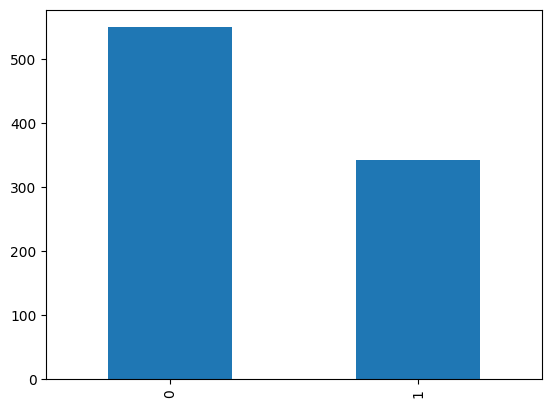

In [5]:
# your code here - create a bar graph
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Survived'].value_counts().plot.bar()
plt.show()
#the distriution:

Based on your value counts and bar graph, describe the distribution for this column. Since this is best treated as categorical, be sure to indicate the mode and whether the distribution is balanced.

your answer here

- Based on my value counts, I don't think the disribution is balanced as there are more non-survivors than there are surviviors. There are above 500 non-survivors and about 350 survivors. it is skewed to the right. and the mode is 0.

## Task 2: EDA - Pclass

Next, you'll look at Pclass. You will compute value counts, create a bar graph, and then comment on the distribution of the column.

In [6]:
# your code here - compute value counts
titanic_df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

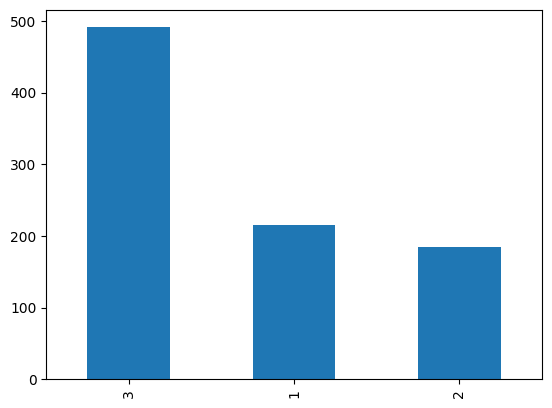

In [7]:
# your code here - create a bar graph
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Pclass'].value_counts().plot.bar()
plt.show()
#the distribution:


Based on your value counts and bar graph, describe the distribution for this column. Since this is ordinal with only three values, be sure to indicate the mode and whether the distribution is balanced.

your answer here

The distribution isn't balanced as much through there's closness between the first and second class in the amount of passengers they contain. it is skewed to the right. There are more people in the third class. 3 is the mode implying the third class.

## Task 3: EDA - Sex

Next, you'll look at Sex. You will compute value counts, create a bar graph, and then comment on the distribution of the column.

In [8]:
# your code here - compute value counts
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

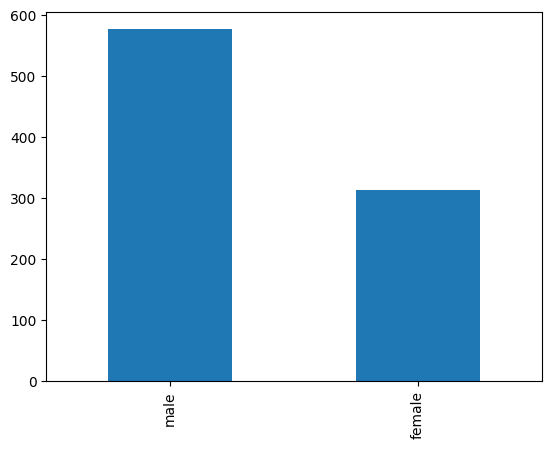

In [9]:
# your code here - create a bar chart
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Sex'].value_counts().plot.bar()
plt.show()
#the distriution

Based on your value counts and bar graph, describe the distribution for this column. Since this is categorical, be sure to indicate the mode and whether the distribution is balanced.

Based on my value counts, I don't think the disribution is balanced as there are more males than there are females. There are above 500, close to 600 for male and a little above 300 for female. is skewed to the right. and the mode is male.

## Task 4: EDA - Age

Next, you'll look at Age. Since this is numerical, you will make a histogram and comment on the distribution. For your histogram, experiment with the number of bins to get a helpful visualization.

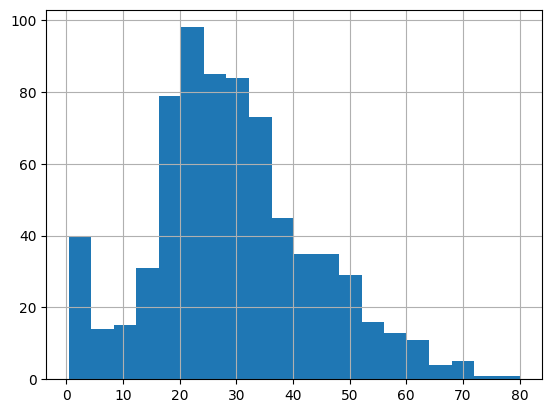

In [16]:
# your code here - make a histogram
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Age'].hist(bins=20)
plt.show()
#I need to confirm that this is the right way interms of the hist,
#for the age.

Based on your histogram, describe the distribution for this column. Since this is numerical, be sure to indicate the modality and whether the data is skewed.

your answer here

the distributuion is slightly skewed to the right. the modality would be the age ranges from 20-25 as there are more people in that age range as we can infere from our histogram.

One more thing to note on Age - there are missing values, and the following line of code tells us how many missing values there are.

In [11]:
titanic_df["Age"].isna().sum()

177

## Task 5: EDA - SibSp

Next, you'll look at SibSp. Since this is numerical, you will make a histogram and comment on the distribution. For your histogram, experiment with the number of bins to get a helpful visualization.

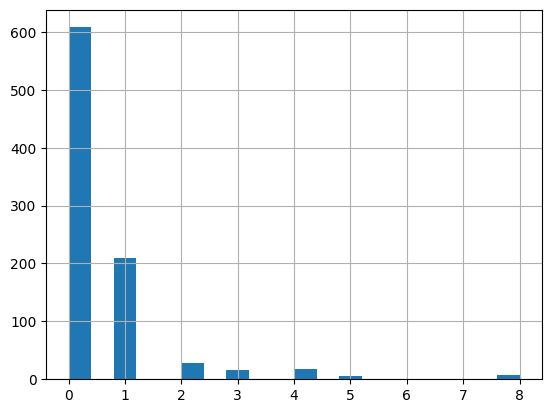

In [15]:
# your code here - make a histogram

import matplotlib.pyplot as plt
plt.figure()
titanic_df['SibSp'].hist(bins=20)
plt.show()
#I need to confirm that this is the right way interms of the hist,
#for the age

Based on your histogram, describe the distribution for this column. Since this is numerical, be sure to indicate the modality and whether the data is skewed.

the distribution is skewed to the right. It saying that a lot of people didnt have any spouses or siblings with them. the modality would be 0.

## Task 6: EDA - Parch

Next, you'll look at Parch. Since this is numerical, you will make a histogram and comment on the distribution. For your histogram, experiment with the number of bins to get a helpful visualization.

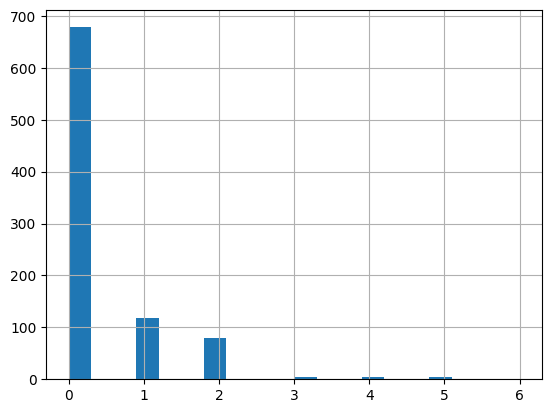

In [17]:
# your code here - make a histogram
# your code here - make a histogram
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Parch'].hist(bins=20)
plt.show()
#I need to confirm that this is the right way interms of the hist,
#for the age

Based on your histogram, describe the distribution for this column. Since this is numerical, be sure to indicate the modality and whether the data is skewed.

its is skewed to the right. The modality is 0. the data shows that most peole on board didn't have their parent or childeren with them.

## Task 7: EDA - Fare

Next, you'll look at Fare. Since this is numerical, you will make a histogram and comment on the distribution. For your histogram, experiment with the number of bins to get a helpful visualization.

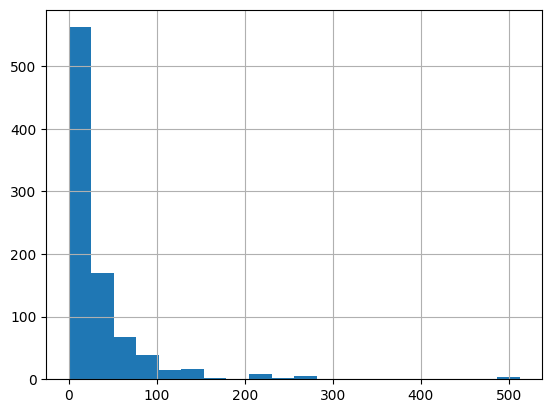

In [21]:
# your code here - make a histogram
# your code here - make a histogram
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Fare'].hist(bins=20)
plt.show()
#I need to confirm that this is the right way interms of the hist,
#for the age

Based on your histogram, describe the distribution for this column. Since this is numerical, be sure to indicate the modality and whether the data is skewed.

it is skewed to the right and te modality is in the range between 0 -30, as more people purchased third class.

## Task 9: EDA - Embarked

Next, you'll look at Embarked. You will compute value counts, create a bar graph, and then comment on the distribution of the column.

In [22]:
# your code here - compute value counts
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

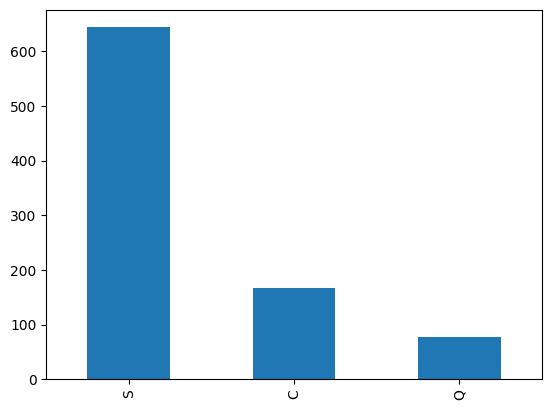

In [23]:
# your code here - make a bar graph
import matplotlib.pyplot as plt
plt.figure()
titanic_df['Embarked'].value_counts().plot.bar()
plt.show()

Based on your value counts and bar graph, describe the distribution for this column. Since this is categorical, be sure to indicate the mode and whether the distribution is balanced.

its skewed to the right. Most people emabrked from southampton, so S is the mode. it's not balanced.

Also note that we have missing values in Embarked. The following line of code counts how many.

In [25]:
titanic_df["Embarked"].isna().sum()

2

## Task 10: Data Cleaning - Conversions

Note that Sex and Embarked are both categorical, with strings as values. The SciKit-Learn decision tree classifier only allows for numbers as feature values, so we will need to convert the string values into numbers.

We start with Sex. Here we define a function to make the conversion. This function converts "male" to 0 and "female" to 1.

Then, we use the `pandas` method `apply` to apply this function to all values in the column for Sex.

In [26]:
def convert_sex(text_sex:str) -> int:
  """Takes a string for the Sex, and returns 0 if the string is 'male', otherwise returns 1"""
  if text_sex == "male":
    return 0
  if text_sex == "female":
    return 1

# apply the conversion to all values in the Sex column
titanic_df["Sex"] = titanic_df["Sex"].apply(convert_sex) #we call the fucntion.

Now when we look at value counts for Sex, we can see that they're represented as 0 and 1.

In [27]:
titanic_df["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

Now, it's your turn! You will convert the Embarked column to numbers. We will map 'S' to 0, 'C' to 1, and 'Q' to 2. Note that this imposes an order on these categorical values. In this case, we put them in order that the titanic stopped at the locations. However, this might not be a useful order for classification - later we will see a method for encoding categorical values as numbers, that does not impose an order.

In [28]:
def convert_embarked(text_embarked:str) -> int:
  if text_embarked == "S":
    return 0

  if text_embarked == "C":
    return 1
  if text_embarked =="Q":
    return 2

  """Takes a string, 'S', 'C', or 'Q'. If the string is 'S', return 0. For 'C', return 1. For 'Q', return 2"""


# your code here - apply the conversion to the Embarked column
titanic_df["Embarked"] = titanic_df["Embarked"].apply(convert_embarked)



In [29]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(convert_embarked('S') == 0)
assert(convert_embarked('C') == 1)
assert(convert_embarked('Q') == 2)
assert(convert_embarked('Z') == None)
assert(list(titanic_df["Embarked"])[:10] == [0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0])
print("Tests for the function find_place passed, but be sure to test your own code as well!")

Tests for the function find_place passed, but be sure to test your own code as well!


When you look at value counts, you should see that the values are now 0, 1, and 2.

In [30]:
titanic_df["Embarked"].value_counts() #is the float ok?

0.0    644
1.0    168
2.0     77
Name: Embarked, dtype: int64

## Data Cleaning - Missing Values

Next, we will deal with the missing values. The following line of code tells us how many missing values are in each column.

In [31]:
titanic_df.isna().sum(axis = 0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Now, we're going to fill in missing values with 0. In general, we need to be a bit careful about how we fill in missing values, and there are better options than just choosing 0. We'll cover this later in the course.

In [32]:
titanic_df.fillna(0, inplace=True)

After running the line above, we can check to see that there are now no missing values.

In [33]:
titanic_df.isna().sum(axis = 0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Note: Later, we will see how we can use the results of our exploratory data analysis to perform data cleaning and transformations that improve the performance of our machine learning algorithms. For this project, we'll just make note of the distributions of our attributes, and keep data cleaning to a minimum**

## Task 11: Features and Target

Now, we will split the data into feature values and target values. Since we are using Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked to predict Survived, our features are Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked, and our target is Survived.

In [34]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = titanic_df[features].values
y = titanic_df["Survived"].values

In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(X.shape == (891, 7))
assert(y.shape == (891,))
assert(list(X[0][:5]) == [3.0, 0.0, 22.0, 1.0, 0.0])
assert(list(y[:5]) == [0, 1, 1, 1, 0])
print("Tests for the function find_place passed, but be sure to test your own code as well!")

Tests for the function find_place passed, but be sure to test your own code as well!


## Task 12: Train-Test Split

Now, split the data into a training set and a testing set. For the function `train_test_split` from SciKit-Learn, use a test size of 0.2 and a random state of 42.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(X_train.shape == (712, 7))
assert(y_train.shape == (712,))
assert(X_test.shape == (179, 7))
assert(y_test.shape == (179,))
assert(list(y_test[:10]) == [1, 0, 0, 1, 1, 1, 1, 0, 1, 1])
assert(list(X_train[5][:10]) == [1.0, 0.0, 24.0, 0.0, 1.0, 247.5208, 1.0])
print("Tests for the function find_place passed, but be sure to test your own code as well!")

Tests for the function find_place passed, but be sure to test your own code as well!


## Task 13: Train Model

Now, you'll make a decision tree classifier, and train it on your training data. For the classifier, use a random state of 42.

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
# your code here - train your classifier on the training data
clf=clf.fit(X_train,y_train)

In [40]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(clf.random_state == 42)
assert(clf.n_classes_ == 2)
#assert(clf.n_features_ == 7)
print("Tests for the function find_place passed, but be sure to test your own code as well!")

Tests for the function find_place passed, but be sure to test your own code as well!


## Task 14: Predict

Next, use your trained classifier to predict labels for the testing set.

In [41]:
y_pred = clf.predict(X_test)

In [42]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(list(y_pred[:20]) == [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])
print("Tests for the function find_place passed, but be sure to test your own code as well!")

Tests for the function find_place passed, but be sure to test your own code as well!


## Task 15: Accuracy

We'll now evaluate the performance of your classifier, by comparing the predicted labels for the testing set with the true labels. We'll first do this by computing the accuracy.

In [45]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.770949720670391

In [ ]:
# TEST CELL - DO NOT CHANGE - RUN THIS CELL TO CHECK YOUR WORK
# Note: passing this cell doesn't guarantee your code is correct or that you will get full credit,
# but should be used to help you check your work
assert(round(accuracy, 2) == 0.77)
print("Tests for the function find_place passed, but be sure to test your own code as well!")

## Task 16: Compare with Your Guess

Compare your accuracy score with your prediction in Task 0. Do you think this is good performance for this data? Do you think that your guess was a reasonable goal?

comparing it my guess wasn't a reasonable goal as I had precicted a higher rate, my intial predictions were worng.

## Task 17: Confusion Matrix

Now, we'll get a more nuanced view of the performance, by computing the confusion matrix. We give you the code to make the confusion matrix, you just need to read the results below.

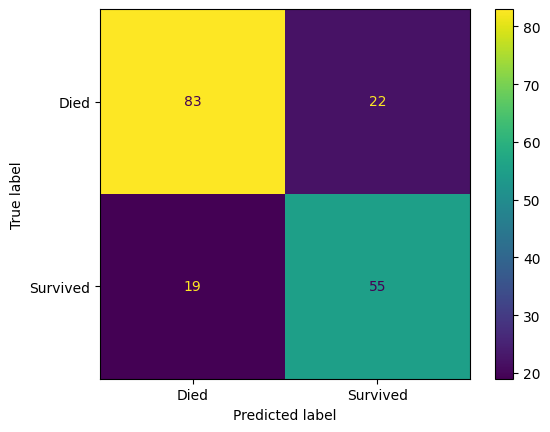

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

num_labels = [0, 1]
labels = ["Died", "Survived"]

cm = confusion_matrix(y_test, y_pred, labels = num_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)
cmd.plot()

For the test set, how many people did your model predict died, and who actually died?

the people that model precicted to be dead were 102, but 83 actually died.

For the test set, how many people did your model predict died, but who actually survived?

19 was predicted as dead but were alive.

For the test set, how many people did your model predict survived, but who actually died?

22

For the test set, how many people did your model predict survived, and who actually survived?

77 were predicted to die, but 55 actually survived.

## Task 18: Decisions (2 points)

Now, let's look at the decision tree model that we produced. By looking at the tree itself, we can see how our machine learning model made decisions, and which features were most important for its decisions.

Below, we plot the entire decision tree - but the tree is too big to reasonably look at the entire thing.

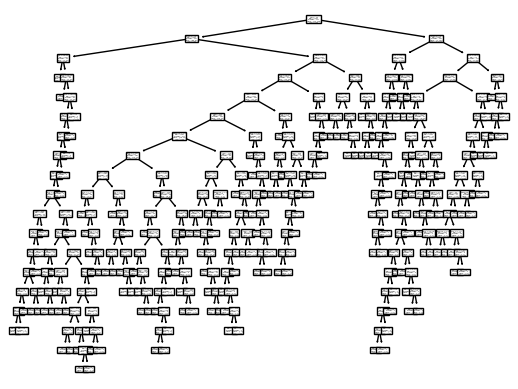

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(clf, feature_names = features, class_names = ["Died", "Survived"])
plt.show()

Since that was too big, let's just look at the first two layers of this tree.

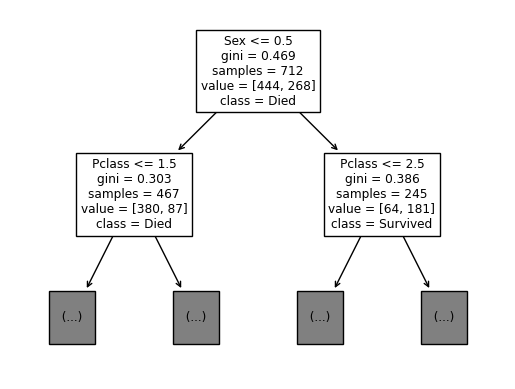

In [48]:
plt.figure()
plot_tree(clf, max_depth = 1, feature_names = features, class_names = ["Died", "Survived"])
plt.show()

Here's how to read this information, for the top node:


*   The decision tree branches based on the value of Sex (0 or 1). If the value is less than or equal to 0.5 (in this case, that would mean that it's 0, and the passenger is male), we follow the left branch. If the value is greater than 0.5 (in this case, that would mean that it's a 1, and the passenger is female), we follow the right branch.
*   gini is gini impurity, which we will cover later.
*   samples is the number of samples that reach this node (from the training set). In this case, all of the samples go to the top node, so this is the total number of samples in our training set.
*   value tells us how many samples that reach this node fall in each class (died or survived). For the top node, 444 of the samples here died, while 268 survived.
*   class gives us the majority class of the samples at this node. Here, the majority died.

For the next node on the right:

*   Remember that the samples with Sex greater than 0.5 follow this path, so the samples at this node are all female passengers.
*   The next decision is based on Pclass. If the passenger's class is 1 or 2, we follow the left branch, continuing down the tree. If the passenger's class is 3, we follow the right branch.
*   Of the samples here (so, of the female passengers from the training set), 64 died and 181 survived.
*   The majority of samples here (so, the majority of female passengers in the training set) survived.



Now, it's your turn to interpret the node on the left. Answer the following questions:

What do all of the samples that reach this node have in common?

your answer here

passengers are most likely in the first class, most of them didn't survive.

What is the next decision based on? Which passengers go which direction from here?

passenger classes with value less than or equal to 1.5 go to the left, while passengers with a class greater than or equal to 2.5 go to the right.

Of the sames here, how many died and how many survived?

245 survived and 467 died

What is the majority class of samples at this node?

The majority class of samples at this node is “Died”.

What does this decision tree tell you about survival of male vs. female passengers on the titanic?

 This decision tree tells us that the survival of male passengers  was lower than that of female passengers.